In [1]:
# Import data wrangling libraries
import pandas as pd
from matplotlib import pyplot as plt

# Import ml modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import explainability threshold
from yellowbrick.classifier import DiscriminationThreshold

In [2]:
# Import the advertising data
df = pd.read_csv("../advertising.csv")
df.columns = df.columns.map(lambda row: "_".join(row.lower().split(" ")))
df

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
# Select a subset of the columns for ease of use
used_features = [
    "daily_time_spent_on_site", 
    "age",
    "area_income", 
    "daily_internet_usage", 
    "male",
]

# Define training data and response variable
X = df[used_features]
y = df["clicked_on_ad"]

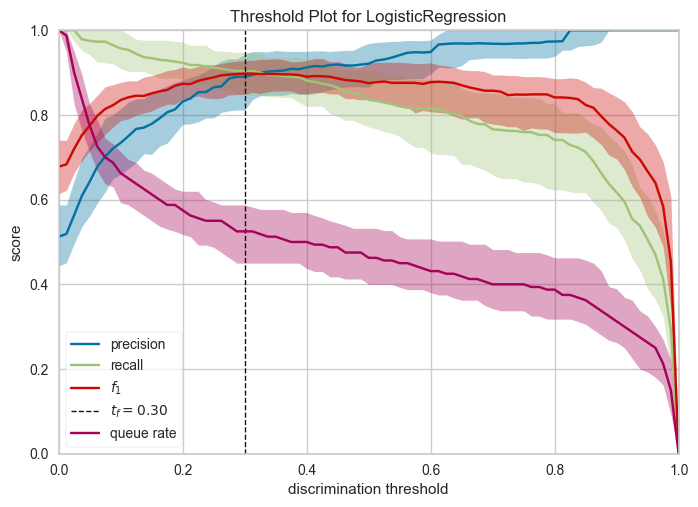

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Instantiate the classification model and visualizer
log_reg_model = LogisticRegression(solver="liblinear")
visualizer = DiscriminationThreshold(log_reg_model, argmax="fscore")  # Maximize based on f1-score.

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()                       # Finalize and render the figure

# NOTE:
# 1. tf = 0.35 suggests that the best discrimination threshold to maximize f1-score is achieved at the 35% threshold.
# 2. The visualizer also accounts for variability in the model by running multiple trials with different train and test splits of the data. 
#    The variability is visualized using a band such that the curve is drawn as the median score of each trial and the band is from the 10th to 90th percentile.

In [ ]:
# NOTE: 
# The discrimination threshold is the probability or score at which the positive class is chosen over the negative class. 
# Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.

# Many classifiers use either a decision_function to score the positive class or a predict_proba function to compute the probability of the positive class. 
# If the score or probability is greater than some discrimination threshold then the positive class is selected, otherwise, the negative class is.

# - Precision:
#   An increase in precision is a reduction in the number of false positives; this metric should be optimized when the cost of special treatment is high (e.g. wasted time in fraud preventing or missing an important email).

# - Recall:
#   An increase in recall decrease the likelihood that the positive class is missed; this metric should be optimized when it is vital to catch the case even at the cost of more false positives.

# - F1 Score:
#   The F1 score is the harmonic mean between precision and recall. The fbeta parameter determines the relative weight of precision and recall when computing this metric, by default set to 1 or F1. 
#   Optimizing this metric produces the best balance between precision and recall.

# - Queue Rate:
#   The “queue” is the spam folder or the inbox of the fraud investigation desk. This metric describes the percentage of instances that must be reviewed. 
#   If review has a high cost (e.g. fraud prevention) then this must be minimized with respect to business requirements; if it doesn’t (e.g. spam filter), this could be optimized to ensure the inbox stays clean.

# Documentation link: https://www.scikit-yb.org/en/latest/api/classifier/threshold.html